In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

#Balancing

In [2]:
df = pd.read_csv('df_acidentes_sp_moto.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Data do Acidente'] = pd.to_datetime(df['Data do Acidente'],format='%Y-%m-%d')
# df['Ano do Acidente'] = pd.to_datetime(df['Ano do Acidente'],format='%Y')
# df['Dia do Acidente'] = pd.to_datetime(df['Dia do Acidente'],format='%d')

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (54,60,61,62,63,65,68,71,72,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   ID                                           62479 non-null  int64         
 1   Data do Acidente                             62479 non-null  datetime64[ns]
 2   Dia do Acidente                              62479 non-null  object        
 3   Mês do Acidente                              62479 non-null  object        
 4   Ano do Acidente                              62479 non-null  object        
 5   Ano/Mês do Acidente                          62479 non-null  float64       
 6   Dia da Semana                                62479 non-null  object        
 7   Hora do Acidente                             62479 non-null  object        
 8   Turno                                        62479 non-null  object        


In [4]:
df.columns

Index(['ID', 'Data do Acidente', 'Dia do Acidente', 'Mês do Acidente',
       'Ano do Acidente', 'Ano/Mês do Acidente', 'Dia da Semana',
       'Hora do Acidente', 'Turno', 'Município', 'Região Administrativa',
       'Logradouro', 'Numero/KM', 'Jurisdição', 'Administração', 'Conservação',
       'Latitude', 'Longitude', 'Condições Climáticas', 'Iluminação',
       'Mão de direção', 'Obras na pista', 'Relevo', 'Superfície da via',
       'Tipo de pavimento', 'Tipo de pista', 'Traçado',
       'Veículos Envolvidos - Bicicleta', 'Veículos Envolvidos - Caminhão',
       'Veículos Envolvidos - Automóvel', 'Veículos Envolvidos - Outros',
       'Veículos Envolvidos - Motocicleta', 'Veículos Envolvidos - Ônibus',
       'Veículos Envolvidos - ND', 'Veículos Envolvidos - Pedestre',
       'Pessoas Envolvidas - Grave', 'Pessoas Envolvidas - Ileso',
       'Pessoas Envolvidas - Leve', 'Pessoas Envolvidas - Fatal',
       'Pessoas Envolvidas - Feridos', 'Pessoas Envolvidas - ND',
       'Serviço

In [5]:
df['Acidente Fatal'].value_counts()

0    58161
1     4318
Name: Acidente Fatal, dtype: int64

In [6]:
proporção_positiva = df['Acidente Fatal'].value_counts()#[1]/len(df)
# print('Proporção de fatais:', round(proporção_positiva,2))

<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidente Fatal'>

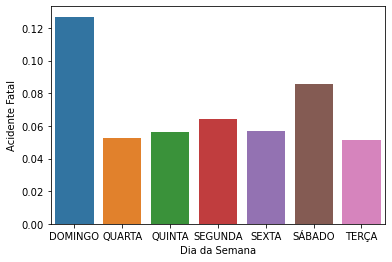

In [7]:
df_g = df.groupby(['Dia da Semana'], as_index=False)['Acidente Fatal'].mean()
sns.barplot(x="Dia da Semana", y="Acidente Fatal", data=df_g)

In [8]:
df_g

,Dia da Semana,Acidente Fatal
0,DOMINGO,0.126887
1,QUARTA,0.052814
2,QUINTA,0.056275
3,SEGUNDA,0.063978
4,SEXTA,0.056671
5,SÁBADO,0.085870
6,TERÇA,0.051430


In [21]:
target = 'Acidente Fatal'

cat_features = ['Dia da Semana','Turno','Tipo de pista', 'Condições Climáticas', 'Iluminação','Superfície da via','Tipo de Via']
df_pre_processed = df[['Dia da Semana','Turno','Tipo de pista', 'Condições Climáticas', 'Iluminação','Superfície da via','Tipo de Via','Acidente Fatal']]

In [22]:
df_processed = pd.get_dummies(df_pre_processed, columns=cat_features, dummy_na=True)


In [23]:
df_processed.columns

Index(['Acidente Fatal', 'Dia da Semana_DOMINGO', 'Dia da Semana_QUARTA',
       'Dia da Semana_QUINTA', 'Dia da Semana_SEGUNDA', 'Dia da Semana_SEXTA',
       'Dia da Semana_SÁBADO', 'Dia da Semana_TERÇA', 'Dia da Semana_nan',
       'Turno_MADRUGADA', 'Turno_MANHA', 'Turno_NAO DISPONIVEL', 'Turno_NOITE',
       'Turno_TARDE', 'Turno_nan', 'Tipo de pista_DUPLA',
       'Tipo de pista_INCLINADO', 'Tipo de pista_MULTIPLA',
       'Tipo de pista_NAO DISPONIVEL', 'Tipo de pista_PLANO',
       'Tipo de pista_SIMPLES', 'Tipo de pista_nan',
       'Condições Climáticas_BOM', 'Condições Climáticas_CHUVA',
       'Condições Climáticas_NAO DISPONIVEL',
       'Condições Climáticas_NEVOEIRO/NEBLINA', 'Condições Climáticas_NUBLADO',
       'Condições Climáticas_URBANA', 'Condições Climáticas_VENTO',
       'Condições Climáticas_nan', 'Iluminação_ENTARDECER/AMANHECER',
       'Iluminação_EXTERNO', 'Iluminação_LUZ SOLAR',
       'Iluminação_NAO DISPONIVEL', 'Iluminação_NOITE (VIA ILUMINADA)',
     

In [24]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Acidente Fatal                         62479 non-null  int64
 1   Dia da Semana_DOMINGO                  62479 non-null  uint8
 2   Dia da Semana_QUARTA                   62479 non-null  uint8
 3   Dia da Semana_QUINTA                   62479 non-null  uint8
 4   Dia da Semana_SEGUNDA                  62479 non-null  uint8
 5   Dia da Semana_SEXTA                    62479 non-null  uint8
 6   Dia da Semana_SÁBADO                   62479 non-null  uint8
 7   Dia da Semana_TERÇA                    62479 non-null  uint8
 8   Dia da Semana_nan                      62479 non-null  uint8
 9   Turno_MADRUGADA                        62479 non-null  uint8
 10  Turno_MANHA                            62479 non-null  uint8
 11  Turno_NAO DISPONIVEL        

In [27]:
#split
X = df_processed.drop(['Acidente Fatal'],axis=1)

y = df_processed['Acidente Fatal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [28]:
#train
classifier = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
clf = classifier.fit(X_train,y_train)#treinando o modelo

In [29]:
clf.coef_

array([[ 0.46224465, -0.11360359, -0.14995967, -0.06328148, -0.10913726,
         0.15590901, -0.18445755,  0.        ,  0.07709564, -1.33405766,
         3.78053427, -1.08951665, -1.4363415 ,  0.        , -0.98615474,
        -0.02532769, -1.24713737,  3.18951326, -0.01576005, -0.9174193 ,
         0.        , -0.23138944,  0.19509112,  0.76818678,  0.13647112,
        -0.82955773, -0.04108774,  0.        ,  0.        ,  0.19678105,
        -0.04108774, -0.22175958,  0.5803083 , -0.13280134,  0.04964537,
        -0.40480674, -0.02856523,  0.        , -0.15786322,  0.74993485,
         0.14568373, -1.76162641, -0.04108774, -0.21077035,  0.44973489,
         0.82370836,  0.        , -0.10947008,  0.68103649, -0.57385231,
         0.        ]])

In [30]:
# Get predicted class, treshold 0.5
y_pred = clf.predict(X_test)

# Get predicted probabilities
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs[:,1]

array([0.17932893, 0.00538833, 0.03609461, ..., 0.00522438, 0.28719846,
       0.01128389])

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


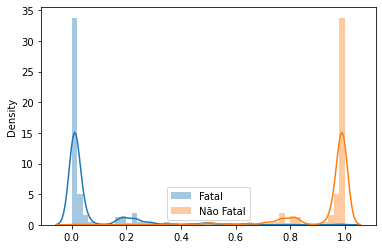

In [31]:
sns.distplot(y_pred_probs[:,1], label='Fatal')
sns.distplot(y_pred_probs[:,0], label='Não Fatal')
plt.legend()
plt.show()

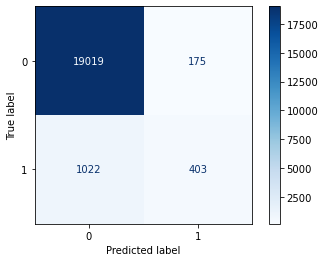

In [32]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.show()
#TP = 51, TN=16823, FP=0, FN=329

In [33]:
# Acurácia: % de predições corretas do modelo
# Precisão: % de predições corretas dentro da classe positiva do seu modelo
# Recall (sensitivity): % das predições corretas dentro da classe esperada como positiva (do real) (ou do universo positivo, quem eu consegui encontrar)

In [34]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.9419467481449149
Precision: 0.6972318339100346
Recall: 0.2828070175438597
F1-Score: 0.4023964053919122


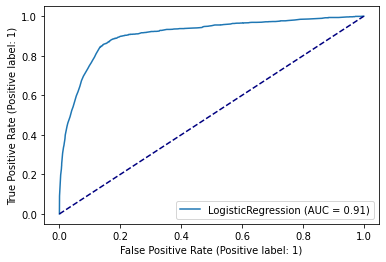

In [35]:
plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

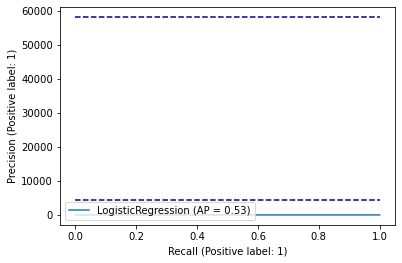

In [36]:
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.plot([0,1], [proporção_positiva, proporção_positiva], color='navy', linestyle='--')
plt.show()

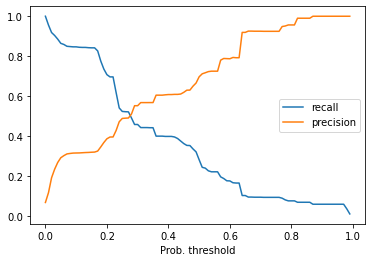

In [37]:
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (clf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
plt.xlabel('Prob. threshold')
plt.show()

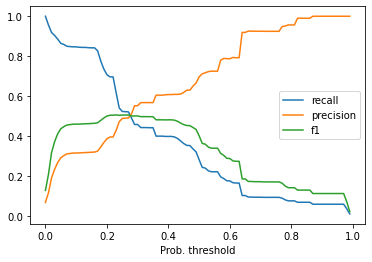

In [38]:
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.show()